And, as usual, let's grab most of the imports we'll need; there may be a few at the bottom, but that's OK.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd

Define some convenience functions for plotting; these are just standard functions I've been porting around.

In [2]:
def to_image(x):
    return np.reshape(x, (28,28))

def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)): 
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(to_image(ims[i]), interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    plt.imshow(to_image(im), interpolation=None if interp else 'none')

def plot_idx(idxs, data, interp=False, titles=None):
    ims=np.array(data)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for index, i in enumerate(idxs): 
        sp=f.add_subplot(1, len(choices), index+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(to_image(ims[i]), interpolation=None if interp else 'none', vmin=mn,vmax=mx)
    plt.gray()
    plt.close()

Use pandas to load the data and just take a peek at the first 10 rows to make sure things look good.

In [3]:
data = pd.read_csv('data/train.csv')
data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Remove the data from the pandas data structures, since you want everything to be numpy.

Plot a few of the images just to make sure what we've done so far is sane.

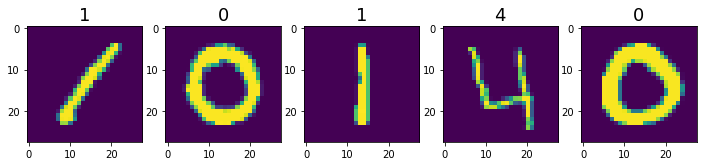

In [4]:
x = np.array(data.as_matrix())
labels = x[:,0]
pixels = x[:,1:]
plots(pixels[:5], titles=labels[:5])

Normalize the data, then plot again just to double check

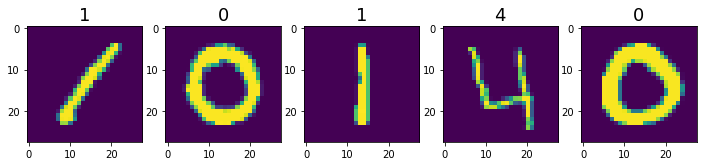

In [5]:
#normalize the pixels
normalized_pixels = pixels/255.0
plots(normalized_pixels[:5], titles=labels[:5])

Set up the TSNE model that we'll be using. Since we're going to do a 2d scatter plot, just pass in 2 for n_components (the first parameter is what defines how many dimensions the embedding space will have).

In [6]:
model = TSNE(n_components=3, random_state=0)

np.set_printoptions(suppress=True)

len(normalized_pixels)

42000

Specify how many elements you want, then take a random sampling from the dataset.

The last line actually fits the model to the data we have. It will come up with a 2d (or n-dimensional) representation of the m-dimensional dataset (in general, m >> n) that we give it.

In [7]:

num_elements = 10000
idxs = np.random.choice(len(normalized_pixels), num_elements)

to_fit = normalized_pixels[idxs]
embedding = model.fit_transform(to_fit)

Since we want to be able to distinguish the points belonging to different labels, we have to assign a different color to each of them. As a result, let's assign an array and populate it with the help of the class labels that we have in the labels vector.

### K-Means clustering
Now, instead of using the truth labels from the dataset, use the sklearn k-means clustering to get labels and then show those. We will get some error, but it'll be interesting to see how well we color everything.

In [15]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=10)
k_means.fit(embedding)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
np.min(k_means.labels_)

0

In [17]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

colors = np.array(
        ['#B0171F',  # indian red - 0
        '#000080',  # navy - 1
        '#2E8B57',  # seagreen - 2
        '#DAA520',  # goldenrod - 3
        '#696969',  # gray - 4
        '#00FFFF',  # cyan - 5
        '#FF00FF',  # magenta - 6
        '#4A708B',  # skyblue - 7
        '#008B45',  # springreen - 8
        '#000000',  # black -9
        ])


label_vec = np.array(k_means.labels_)

color_vec = colors[label_vec]
label_vec = labels[idxs]
trace1 = go.Scatter3d(
    x=embedding[:,0],
    y=embedding[:,1],
    z=embedding[:,2],
    text=label_vec,
    mode='markers',
    marker=dict(
        size=12,
        color=color_vec,
        opacity=1.0
    )
)

data=[trace1]

layout = go.Layout(margin=dict(l=0,r=0,b=0,t=0))

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='simple-3d-scatter')


In [ ]:
k_means.labels_[:5]

### MST Clustering
Since that sucked, let's try the MST based clustering algorithm.

<b>Note: </b> I haven't been able to figure out how to specify the number of clusters, but I guess in the real world, that is what would be the case.

In [15]:
from mst_clustering import MSTClustering

working_set = normalized_pixels

estimator = MSTClustering(cutoff=2)
labels = estimator.fit_predict(working_set)



In [14]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

colors = np.array(
        ['#B0171F',  # indian red - 0
        '#000080',  # navy - 1
        '#2E8B57',  # seagreen - 2
        '#DAA520',  # goldenrod - 3
        '#696969',  # gray - 4
        '#00FFFF',  # cyan - 5
        '#FF00FF',  # magenta - 6
        '#4A708B',  # skyblue - 7
        '#008B45',  # springreen - 8
        '#000000',  # black -9
        ])


label_vec = np.array(labels)

color_vec = colors[label_vec]
#label_vec = labels[idxs]
trace1 = go.Scatter3d(
    x=embedding[:,0],
    y=embedding[:,1],
    z=embedding[:,2],
    text=labels,
    mode='markers',
    marker=dict(
        size=12,
        color=color_vec,
        opacity=1.0
    )
)

data=[trace1]

layout = go.Layout(margin=dict(l=0,r=0,b=0,t=0))

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='simple-3d-scatter')
